<h1 align="center"> CSEN 1022 Assignment Submission </h1> 

## Please don't forget to fill in this data
Member 1 Name: Mohamed Aboelazaiem Salama

Member 1 ID: 40-6227

Member 1 Tutorial: T-08

Member 2 Name: Bassem Ayman

Member 2 ID: 40-5839

Member 2 Tutorial: T-07

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [2]:
# Read Training Images, Testing Images, Training Labels, Testing Labels
# Use Assignment 0 for reference.
train = np.array([plt.imread('Data/Train/'+str(i)+'.jpg').reshape(-1) for i in range(1,2401)])
test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range(1,201)])
train_labels = np.loadtxt("Data/Train/Training Labels.txt")
test_labels = np.loadtxt("Data/Test/Test Labels.txt")
print(train.shape, test.shape)
print(train_labels.shape,test_labels.shape)


(2400, 784) (200, 784)
(2400,) (200,)


In [3]:
# Grouping the indexes of each image_number representation in an array where each index in it is an array containing 240 elements corresponding to the indexes of each number
class_indexes = []
for i in range(10):
    class_indexes.append(np.argwhere(train_labels == i)) 
print(np.array(class_indexes),np.array(class_indexes).shape)
# print(train[0])

[[[   0]
  [   1]
  [   2]
  ...
  [ 237]
  [ 238]
  [ 239]]

 [[ 240]
  [ 241]
  [ 242]
  ...
  [ 477]
  [ 478]
  [ 479]]

 [[ 480]
  [ 481]
  [ 482]
  ...
  [ 717]
  [ 718]
  [ 719]]

 ...

 [[1680]
  [1681]
  [1682]
  ...
  [1917]
  [1918]
  [1919]]

 [[1920]
  [1921]
  [1922]
  ...
  [2157]
  [2158]
  [2159]]

 [[2160]
  [2161]
  [2162]
  ...
  [2397]
  [2398]
  [2399]]] (10, 240, 1)


In [4]:
## Mean
def mean(arr1):
    dimension = arr1.shape
#     print((dimension))
    if(len(dimension)>2):
        columns = dimension[2]
    else:
        columns = dimension[1]
    rows = dimension[0]
#     print(dimension)
    arr = np.zeros((784))
    index = 0
    for j in range(columns):
        sum = 0
        for i in range(rows):
            if(len(dimension)>2):
                sum+= arr1[i][0][j]
            else:
                sum+= arr1[i][j]
        arr[j] = sum/rows
    return np.array(arr)

## Covariance
def cov(x,y):
    cov = 0
    if len(x) != len(y):
        return
    n = len(x)
    xy = [x[i]*y[i] for i in range(n)]
    mean_x = mean(x)
    mean_y = mean(y)
    for i in range(n):
        cov += (x[i]-mean_x)*(y[i]-mean_y) 
    return cov/n
 

    
## Transpose of matrix
def transp(arr):
    tr = [[arr[j][i] for j in range(len(arr))] for i in range(len(arr[0]))] 
    return np.array(tr)

## Dot product 
def dot(x, y):
    return sum(i*j for i, j in zip(x, y))

## Compute weight vectors

In [5]:
def getWeightVector():
    classMean = np.zeros((10, 784))
    classMean2 = np.zeros((10, 784))
    otherClassMeans = np.zeros((10, 784))
    otherClassMeans2 = np.zeros((10, 784))

    otherClasses = []
    Sw1, Sw2, Sw = np.zeros((10, 784, 784)), np.zeros((10, 784, 784)), np.zeros((10, 784, 784))
    Sw_inverse = Sw
    W = np.zeros((10, 784, 1))
    for i in range(10):
         # Get the mean of every index for all 240 of class i
#         classMean[i]= np.mean(train[class_indexes[i]],axis=0)
#         print(np.array(train[class_indexes[i]]).shape)
        classMean[i]= mean(train[class_indexes[i]])
        # one-versus-the-rest approach ... leaving all the other classes except current class in the array (2400-240)
        otherClasses.append(np.delete(train, class_indexes[i], axis=0))
#         print(np.array(otherClasses).shape)
        # Get the mean of all of the other classes
        otherClassMeans[i] = mean(otherClasses[i])
#         otherClassMeans2[i] = mean(otherClasses[i])
#         comparison = np.array(classMean[i]) == np.array(classMean2[i])
#         equal_arrays = comparison.all() 
#         print(equal_arrays)
#         print(train[class_indexes[i]].shape,classMean[i].shape)
        ## Reshaping train[class_indexes[i]] to match the classMean dimensions for subtraction
        X_nReshaped = train[class_indexes[i]].reshape(-1, 784)
#         print(train[class_indexes[i]].shape,classMean[i].shape)
        # Subtracting each element from the mean following the first argument in rule Sw1 = sum(Xn-mean(c1).(Xn-mean(c1)T))
        Xn1_mean_subtracted = np.subtract(X_nReshaped,classMean[i])
        ## Getting the second argument (Xn-mean(c1)T
        Xn1_mean_subtracted_transpose = transp(Xn1_mean_subtracted)
        ## Applying dot product on the 2 arguments to have the First part of the equation for class1
#         Sw1[i] = Xn1_mean_subtracted_transpose.dot(Xn1_mean_subtracted)
        Sw1[i] = Xn1_mean_subtracted_transpose.dot(Xn1_mean_subtracted)
        ## Applying the same formula for class2
        Xn2_mean_subtracted = np.subtract(otherClasses[i], otherClassMeans[i])
        Xn2_mean_subtracted_transpose = transp(Xn2_mean_subtracted)
#         Sw2[i] = Xn2_mean_subtracted_transpose.dot(Xn2_mean_subtracted)
        Sw2[i] = Xn2_mean_subtracted_transpose.dot(Xn2_mean_subtracted)
        ## Adding sum(Xn-mean(c1).(Xn-mean(c1)T))+sum(Xn-mean(c2).(Xn-mean(c2)T))
        Sw[i] = Sw1[i] + Sw2[i]
        # Now we have the distance within the two classes (784,784)
        # Getting the weight vector from the rule Sw-1(m2-m1)
        Sw_inverse[i] = np.linalg.pinv(Sw[i])
        # m2 - m1 
        mean_Subtraction = np.subtract(otherClassMeans[i],classMean[i])
#         print(mean_Subtraction.shape,Sw_inverse[i].shape)
        # Reshaping mean_Subtraction to (784,1)
        mean_Subtraction = mean_Subtraction.reshape(-1, 1)
        # Get Weight Vector
        W[i] = np.dot(Sw_inverse[i],mean_Subtraction)
    return W,classMean,otherClassMeans

In [14]:
W = getWeightVector()

In [30]:
Y = np.zeros((len(test), 10))
predicted = np.zeros((len(test)), dtype=int)
## Computing the prediction set by applying the same formula to the test function (Weight_Vector_transpose . each vector in the test set)) )
for j in range(len(test)):
    for i in range(10):
        weight_vector_transpose = transp(W[0][i])
        Y[j, i] = np.dot(weight_vector_transpose,  test[j])
    # Returning the index of the min value in each prediction
    predicted[j] = np.argmin(Y[j])
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 2, 1,
       2, 2, 2, 4, 3, 2, 3, 2, 1, 5, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 4, 4, 4, 4, 4, 4, 6,
       6, 5, 4, 4, 8, 9, 4, 6, 3, 8, 4, 9, 8, 5, 8, 3, 5, 5, 5, 5, 5, 5,
       9, 8, 6, 5, 8, 5, 9, 3, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 7, 2, 7,
       9, 7, 7, 7, 7, 3, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8,
       8, 8, 8, 8, 9, 7, 9, 7, 7, 7, 3, 3, 9, 3, 4, 9, 9, 9, 7, 9, 9, 0,
       9, 9])

In [31]:
test_labels = test_labels.astype(int)
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9])

## Compute confusion matrix

In [32]:
# Please return a variable named confusion_matrix so the next cell would work.
## Implementing the confusion matrix by calculating the occurence of predictions of each class per the actual labels
confusion_matrix = [[0] * 10 for i in range(10)]
for pred, lbl in zip(predicted, test_labels):
    confusion_matrix[pred][lbl] += 1
confusion_matrix = np.array(confusion_matrix)
confusion_matrix = transp(confusion_matrix)
confusion_matrix

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 12,  2,  2,  1,  0,  0,  1,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1, 10,  1,  3,  0,  3,  2],
       [ 0,  0,  0,  2,  0, 11,  1,  0,  4,  2],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 16,  0,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  0, 18,  0],
       [ 1,  0,  0,  3,  1,  0,  0,  5,  0, 10]])

## Plot confusion matrix and print accuracy (Don't edit)

Overall accuracy:  0.77


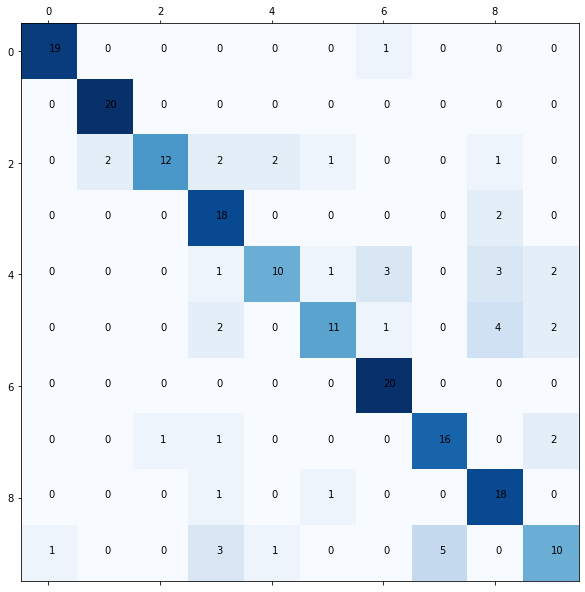

In [33]:
# PLEASE DON'T EDIT THIS CELL

# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))
plt.savefig('Confusion_NoBias.jpg')
# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])

## Compute bias node for each classifier

In [34]:
W0 = np.zeros((10))
## Computing the bias by using rule (WeightVector_transpose . (mean2+mean1)/2)
for i in range(10):
    weight_vector_transpose = transp(W[0][i])
    W0[i] = -0.5 * np.dot(weight_vector_transpose, (W[1][i] + W[2][i]))
print(W0)

[0.00619621 0.00273676 0.00678718 0.00703005 0.00288468 0.0031758
 0.00848218 0.0060023  0.00699402 0.00354216]


In [35]:
Y = np.zeros((len(test), 10))
predicted = np.zeros((len(test)), dtype=int)
for j in range(len(test)):
    for i in range(10):
        weight_vector_transpose = transp(W[0][i])
        Y[j, i] = np.dot(weight_vector_transpose,  test[j]) + W0[i]
    predicted[j] = np.argmin(Y[j])
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 2, 0, 4, 3, 2, 3, 2, 1, 5, 2, 2, 4, 2, 2, 2, 3, 3, 3, 3, 5, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 8, 4, 4, 4, 4, 4, 4, 9, 8, 5, 5, 3, 5, 5, 5, 5, 5, 5,
       9, 8, 6, 5, 5, 5, 9, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 7, 9, 2, 7,
       9, 7, 7, 7, 7, 3, 8, 5, 8, 9, 5, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8,
       8, 8, 8, 5, 9, 7, 9, 7, 7, 9, 3, 5, 9, 9, 4, 9, 9, 9, 9, 9, 9, 0,
       9, 9])

## Compute confusion matrix

In [36]:
# Please return a variable named confusion_matrix so the next cell would work.
## Implementing the confusion matrix by calculating the occurence of predictions of each class per the actual labels
confusion_matrix = [[0] * 10 for i in range(10)]
for pred, lbl in zip(predicted, test_labels):
    confusion_matrix[pred][lbl] += 1
confusion_matrix = np.array(confusion_matrix)
confusion_matrix = transp(confusion_matrix)
confusion_matrix

array([[19,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3, 11,  2,  2,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  1,  0, 14,  1,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0, 15,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 1,  0,  0,  1,  1,  1,  0,  3,  0, 13]])

## Plot confusion matrix and print accuracy (Don't edit)

Overall accuracy:  0.805


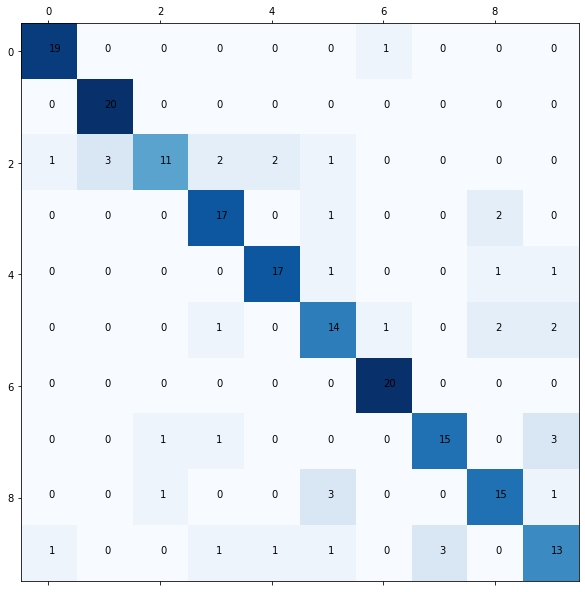

In [37]:
# PLEASE DON'T EDIT THIS CELL

# Plot Confusion Matrix
plt.rc('figure', figsize=[20,10])
plt.matshow(confusion_matrix,cmap='Blues')
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))
plt.savefig('Confusion_WithBias.jpg')
# Calculate Accuracy
print("Overall accuracy: ",(np.sum(np.diag(confusion_matrix)))/test.shape[0])